To start working with CSV data in Numpy and Pandas, we first need to start by importing the libraries into our Python environment. By convention, Numpy is aslways imported with np as its alias name and Pandas is always imported with pd as its alias name.

We also need to import the Pyplot methods from Matplotlib library along with the seaborn library to create Data Visualizations. But before importing the matplotlib library, we need to run a magic command "%matplotlib inline" for being able to display the plots inline.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We use the pd.read_csv(filename,delimiter) to read the csv file as a Pandas Dataframe. The Pandas Dataframe is a 2-Dimensional data structure i.e data is aligned in a tabular fashion in rows and columns.

The significance of index_col = 0 is to consider the first column as Index Axis and the significance of the second line of code is to set the Index Axis name to None

In [2]:
gun_deaths = pd.read_csv("guns.csv", index_col = 0)
gun_deaths.index.name = None

In [3]:
# Exploring the data set with the help of info() method which gives us an overview of all the dtypes used in our datafrane, along with its shape and some extra information
gun_deaths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100798 entries, 1 to 100798
Data columns (total 10 columns):
year         100798 non-null int64
month        100798 non-null int64
intent       100797 non-null object
police       100798 non-null int64
sex          100798 non-null object
age          100780 non-null float64
race         100798 non-null object
hispanic     100798 non-null int64
place        99414 non-null object
education    100745 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 8.5+ MB


In [4]:
# Displaying the first 5 rows to get a glimpse of our dataset
gun_deaths.head()

,year,month,intent,police,sex,age,race,hispanic,place,education
1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
2,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
3,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
4,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
5,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0


By looking at the shape and content of the dataset, it becomes tedious and time-consuming to anayze the data in table form. We therefore analyze the data by creating frequency distribution tables for unique values in the columns and visualize the data in the frequency distribution tables

                EXPLORING THE DATASET TO FIND OUT PATTERNS IN GUN DEATHS BASED IN THE YEAR AND GENDER

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


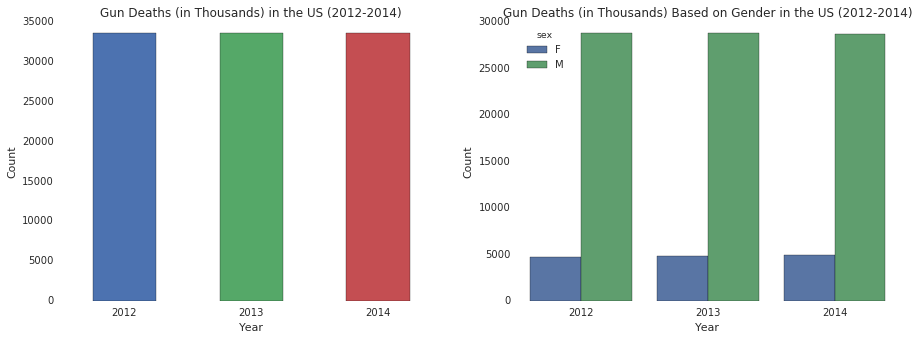

In [5]:
# Setting the style for the plot using the sns.set_style() method
sns.set_style("white")

# Creating a figure object and setting the size of the figure
fig = plt.figure(figsize = (15,5))

# Creating axes object and adding a subplot in the figure container
ax1 = fig.add_subplot(1,2,1)

# Plotting a bar graphs to compare the number of gun deaths per year
ax1 = gun_deaths['year'].value_counts().sort_index().plot.bar(rot = 0, title = 'Gun Deaths (in Thousands) in the US (2012-2014)')

# Decorating the plot by adding x-axis and y-axis label
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')

# Creating axes object and adding a subplot in the figure container
ax2 = fig.add_subplot(1,2,2)

# Plotting a graph to compare gun deaths per year on the basis of gender
ax2 = sns.countplot(x = 'year', order = [2012, 2013, 2014], hue = 'sex', hue_order = ['F','M'], data = gun_deaths)

# Decorating the plot by adding title, x-axis and y-axis label
ax2.set_title('Gun Deaths (in Thousands) Based on Gender in the US (2012-2014)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Count')

sns.despine(bottom=True, left=True)

# Displaying the plot using the show() method
plt.show()

As we see there is hardly any difference in the total number of gun deaths per year as well as on the basis of gender in the US. Although we can conclude that there are far more men dying by guns than women in the US.

To get more insights or granular level information on the number of deaths during the period 2012-2014, we compare deaths on the basis of months across the 3 year period.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


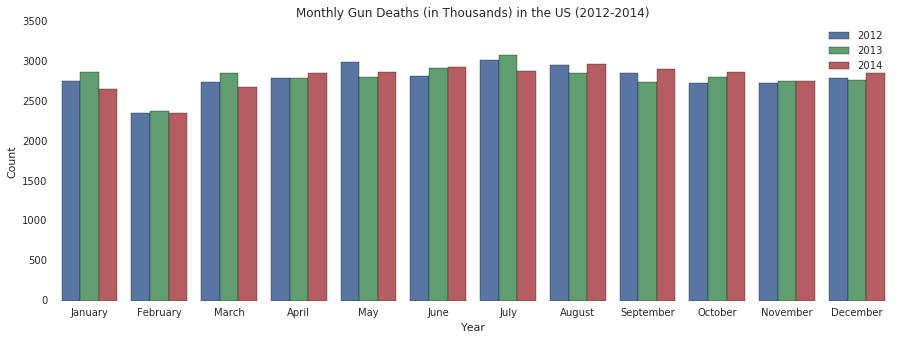

In [6]:
# Creating a figure object and setting the size of the figure
fig = plt.figure(figsize=(15,5))

# Creating a countplot using the seaborn library to compare frequency distributions across months
sns.countplot(x = 'month', hue = 'year', data = gun_deaths)

# Decorating the plot by adding title, setting the x-axis tick values, x-axis and y-axis label, despining the graph to increase the ink ratio and adjusting the legend to be displayed properly
plt.title('Monthly Gun Deaths (in Thousands) in the US (2012-2014)')
plt.xlabel('Year')
plt.ylabel('Count')
month = ["January","February","March","April","May","June","July","August","September","October","November","December"]
plt.xticks(np.arange(0,12), month)
plt.legend(loc = 'upper right')

sns.despine(bottom=True, left=True)

# Displaying the plot using the show() method
plt.show()

                   EXPLORING THE DATASET AND ANALYZING PATTERNS IN GUN DEATHS BASED ON THE RACE OF THE VICTIM

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


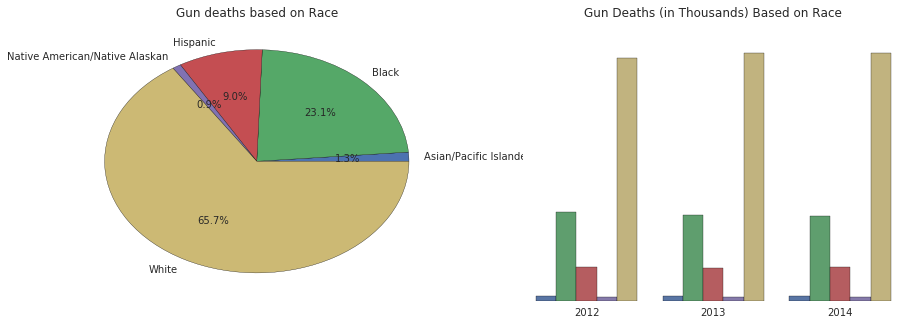

In [7]:
# Creating a figure object and setting the size of the figure
fig = plt.figure(figsize=(15,5))                 
                 
# Creating axes object and adding a subplot in the figure container
ax1 = fig.add_subplot(1,2,1)

# Plotting a pie chart to display the proportion of gun-deaths throughout the period based on race
ax1 = gun_deaths['race'].value_counts().sort_index().plot.pie(autopct = '%.1f%%')

# Decorating the plot by removing the y-axis label, adding title
ax1.set_ylabel('')
ax1.set_title('Gun deaths based on Race')

# Creating axes object and adding a subplot in the figure container
ax2 = fig.add_subplot(1,2,2)

# Plotting a bar graph to further explore the number of gun deaths every year based on the race
ax2 = sns.countplot(x = 'year', hue = 'race', hue_order = ['Asian/Pacific Islander','Black','Hispanic','Native American/Native Alaskan','White'], data = gun_deaths)

# Decorating the plot by adding title, setting the x-axis tick values, x-axis and y-axis label, despining the graph to increase the ink ratio and adjusting the legend to be displayed properly
ax2.set_title('Gun Deaths (in Thousands) Based on Race')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_yticks([])
ax2.legend_.remove()

sns.despine(bottom=True, left=True)

# Displaying the plot using the show() method
plt.show()

                               CREATING VISUALIZATIONS TO ANALYZE GUN DEATHS BASED ON AGE

/dataquest/system/env/python3/lib/python3.4/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/dataquest/system/env/python3/lib/python3.4/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


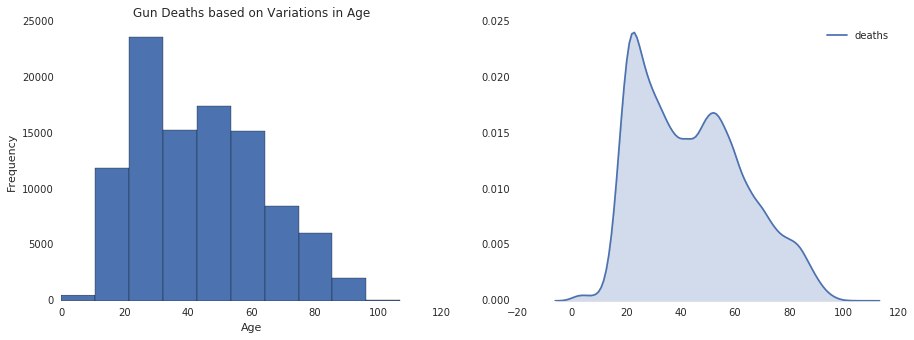

In [11]:
fig = plt.figure(figsize = (15,5))

# Plotting a histogram to analyse the trends in gun deaths based on the age of the victim
ax1 = fig.add_subplot(1,2,1)
ax1 = gun_deaths['age'].plot.hist()

# Decorating the histogram by adding title, x-axis and y-axis label, removing spines
ax1.set_title('Gun Deaths based on Variations in Age')
ax1.set_xlabel('Age')

# Plotting a KDE to explore density of gun deaths on the basis of age
ax2 = fig.add_subplot(1,2,2)
ax2 = sns.kdeplot(gun_deaths['age'], shade = True, label = 'deaths')
# ax2 = gun_deaths['age'].plot.kde(shade = True, label = 'deaths', legend = True)

sns.despine(left = True, bottom = True)

plt.show()

                COMBINING VARIABLES LIKE RACE, AGE, INTENT, PLACE TO ANALYZE ANY TRENDS IN GUN DEATHS

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


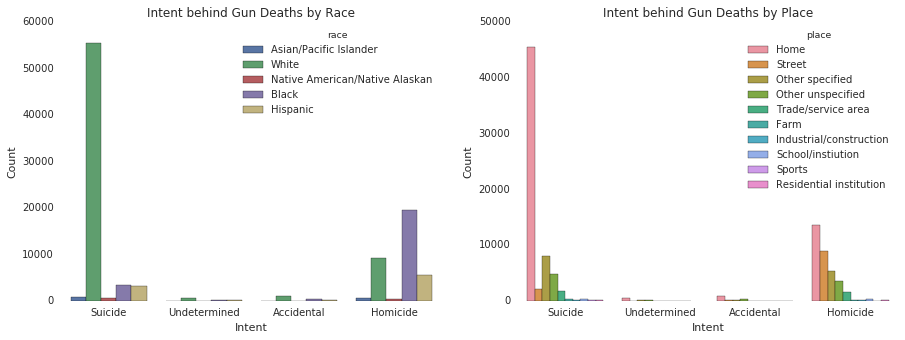

In [91]:
fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(1,2,1)

# Plotting intent variable as a bar plot and adding race as a conditioning parameter to understand what causes most deaths via gun in the US
ax1 = sns.countplot(x = 'intent', hue = 'race', data = gun_deaths)
ax1.set_title('Intent behind Gun Deaths by Race')
ax1.set_xlabel('Intent')
ax1.set_ylabel('Count')

ax2 = fig.add_subplot(1,2,2)

# Plotting intent variable as a bar plot and adding place as a conditioning parameter to understand where does most of the accidents occur
ax2 = sns.countplot(x = 'intent', hue = 'place', data = gun_deaths)
ax2.set_title('Intent behind Gun Deaths by Place')
ax2.set_xlabel('Intent')
ax2.set_ylabel('Count')

sns.despine(bottom = True, left = True)

plt.show()

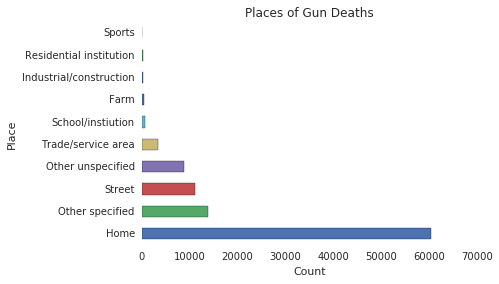

In [86]:
# Plotting a horizontal bar plot which displays information on the places most associated with gun deaths
gun_deaths['place'].value_counts().plot.barh(align = 'center')
plt.title('Places of Gun Deaths')
plt.xlabel('Count')
plt.ylabel('Place')

sns.despine(bottom = True, left = True)

plt.show()

                               EXPLORING THE EFFECT OF AGE ON INTENT AND RACE ON GUN DEATHS

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


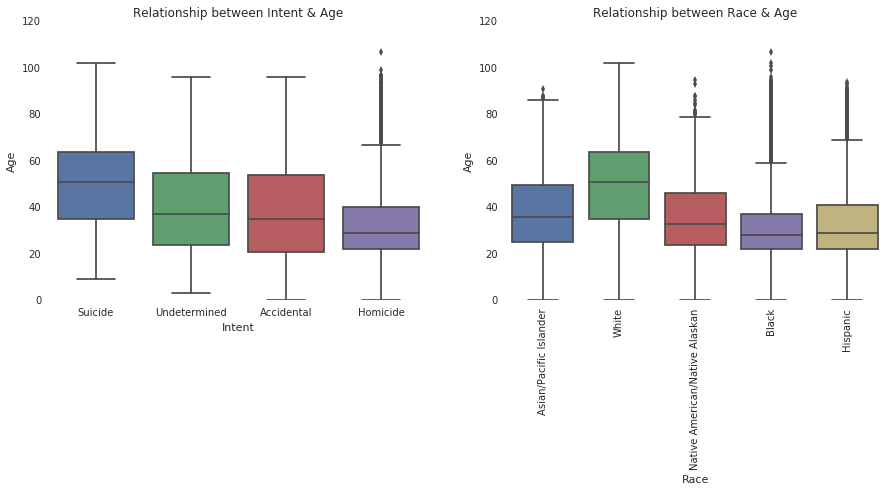

In [106]:
fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(1,2,1)

# Plotting intent variable as a box plot and adding age as a conditioning parameter
ax1 = sns.boxplot(x = 'intent', y = 'age', data = gun_deaths)
ax1.set_title('Relationship between Intent & Age')
ax1.set_xlabel('Intent')
ax1.set_ylabel('Age')

ax1 = fig.add_subplot(1,2,2)

# Plotting race variable as a box plot and adding age as a conditioning parameter
ax2 = sns.boxplot(x = 'race', y = 'age', data = gun_deaths)
ax2.set_title('Relationship between Race & Age')
ax2.set_xlabel('Race')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
ax2.set_ylabel('Age')

sns.despine(bottom = True, left = True)

plt.show()